# HIRE or NOT !

## Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [28]:
dataset = pd.read_csv('recruitment_data.csv')

#### Display of sample dataset

In [29]:
dataset.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


--> Distance from company isn't considered much during hiring, so we'll drop that feature

#### Droping 'DistanceFromCompany' column

In [30]:
dataset.drop('DistanceFromCompany', axis=1, inplace=True)

## Variables Description :

Age :
Data Range: 20 to 50 years.

Gender :
 Male (0) or Female (1).

Education Level :<br>
Categories:<br>
1: B.Sc. <br>
2: B-Tech <br>
3: Master's<br>
4: PhD<br>

Experience Years :
Data Range: 0 to 15 years.

Previous Companies Worked :
Data Range: 1 to 5 companies.

Interview Score :
Data Range: 0 to 100.

Skill Score :
Data Range: 0 to 100.

Personality Score :
Data Range: 0 to 100.

Recruitment Strategy :
Description: Strategy adopted by the hiring team for recruitment.<br>
Categories:<br>
1: Aggressive<br>
2: Moderate<br>
3: Conservative<br>

Hiring Decision :<br>
0: Not hired<br>
1: Hired<br>

# Exploratory Data Analysis

## Understanding our Data

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1500 non-null   int64
 1   Gender               1500 non-null   int64
 2   EducationLevel       1500 non-null   int64
 3   ExperienceYears      1500 non-null   int64
 4   PreviousCompanies    1500 non-null   int64
 5   InterviewScore       1500 non-null   int64
 6   SkillScore           1500 non-null   int64
 7   PersonalityScore     1500 non-null   int64
 8   RecruitmentStrategy  1500 non-null   int64
 9   HiringDecision       1500 non-null   int64
dtypes: int64(10)
memory usage: 117.3 KB


In [32]:
dataset.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,100.000000,100.000000,100.000000,3.000000,1.000000


#### Checking for any missing value(s)

In [33]:
dataset.isnull().sum()

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0
HiringDecision,0


--> There are no missing values in the data

#### Checking for duplicate values

In [34]:
dataset.duplicated().sum()

np.int64(0)

--> No duplicate values found

#### Understanding the correlations between input features and hiring decision

In [35]:
dataset.corr()['HiringDecision']

,HiringDecision
Age,0.001850
Gender,-0.002249
EducationLevel,0.236710
ExperienceYears,0.122494
PreviousCompanies,0.044025
InterviewScore,0.146064
SkillScore,0.203668
PersonalityScore,0.169177
RecruitmentStrategy,-0.477552
HiringDecision,1.000000


--> This describes how all parameters are correlated with the 'Hiring Decision'

## Exploring through Age

### Selecting the required columns

In [36]:
dataset_age = dataset[['Age', 'PreviousCompanies', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'HiringDecision']]

### Setting the intervals

In [37]:
bins = [20, 25, 30, 35, 40, 45, 50]
intervals = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50']

### Adding a new column for the age group

In [38]:
dataset_age['AgeGroup'] = pd.cut(dataset_age['Age'], bins=bins, labels=intervals, right=False)

<ipython-input-38-d845863bb2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_age['AgeGroup'] = pd.cut(dataset_age['Age'], bins=bins, labels=intervals, right=False)


### Creating dataframes according to the column considered

In [39]:
dataset_age_na = dataset_age.groupby('AgeGroup').size()
dataset_age_pc = dataset_age[['AgeGroup', 'PreviousCompanies']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_is = dataset_age[['AgeGroup', 'InterviewScore']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_ss = dataset_age[['AgeGroup', 'SkillScore']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_ps = dataset_age[['AgeGroup', 'PersonalityScore']].groupby('AgeGroup').mean(numeric_only = True)

<ipython-input-39-d42fe1dcae5a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_age_na = dataset_age.groupby('AgeGroup').size()
<ipython-input-39-d42fe1dcae5a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_age_pc = dataset_age[['AgeGroup', 'PreviousCompanies']].groupby('AgeGroup').mean(numeric_only = True)
<ipython-input-39-d42fe1dcae5a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_age_is 

### Printing the generated dataframes

In [40]:
print(dataset_age_na.head(), "\n\n")
print(dataset_age_pc.head(), "\n\n")
print(dataset_age_is.head(), "\n\n")
print(dataset_age_ss.head(), "\n\n")
print(dataset_age_ps.head(), "\n\n")

AgeGroup
20-25    273
25-30    217
30-35    219
35-40    227
40-45    242
dtype: int64 


          PreviousCompanies
AgeGroup                   
20-25              3.010989
25-30              3.082949
30-35              3.027397
35-40              3.044053
40-45              2.991736 


          InterviewScore
AgeGroup                
20-25          50.347985
25-30          52.188940
30-35          50.557078
35-40          51.488987
40-45          51.223140 


          SkillScore
AgeGroup            
20-25      50.531136
25-30      55.138249
30-35      49.826484
35-40      48.488987
40-45      49.789256 


          PersonalityScore
AgeGroup                  
20-25            46.908425
25-30            45.635945
30-35            52.351598
35-40            50.352423
40-45            52.371901 




### Bar Graph Visualization of different columns

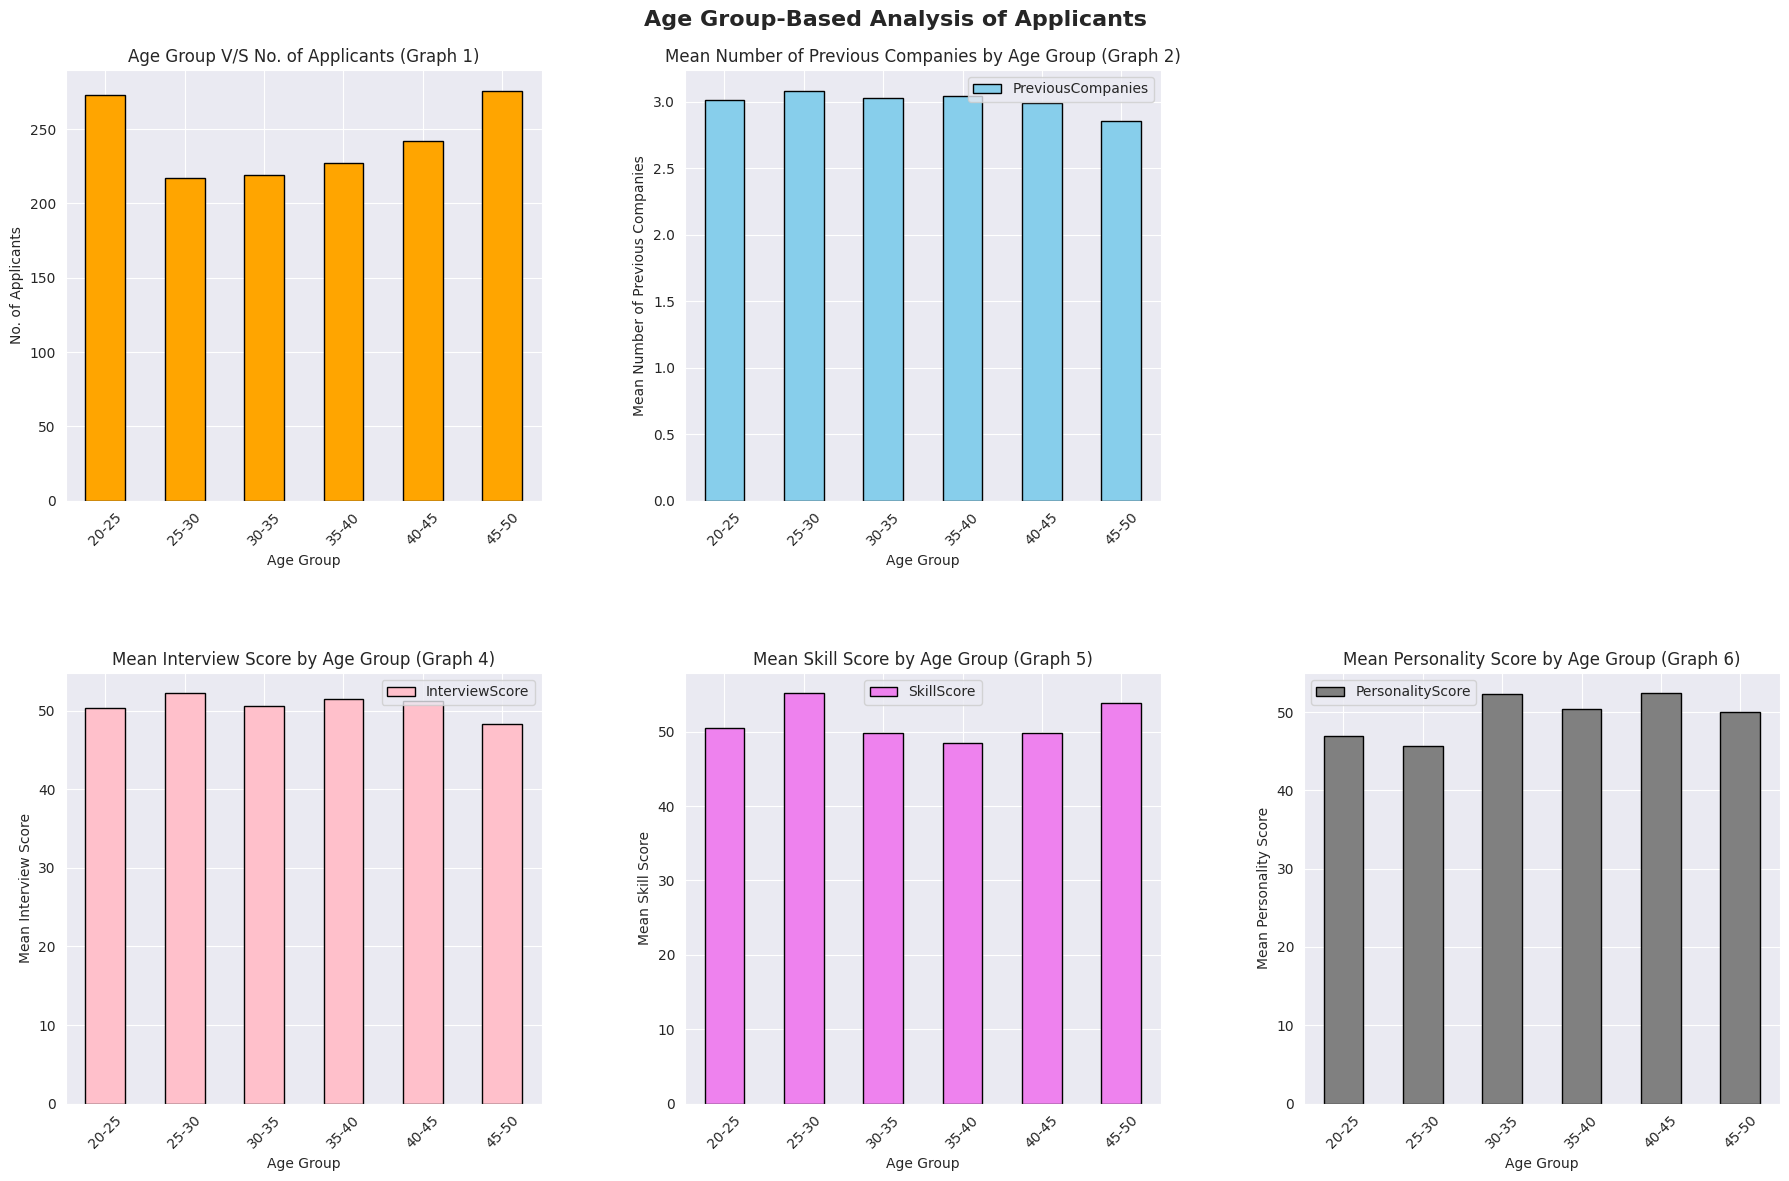

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the total number of applicants
dataset_age_na.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Age Group V/S No. of Applicants (Graph 1)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('No. of Applicants')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the mean number of previous companies by age group
dataset_age_pc.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Previous Companies by Age Group (Graph 2)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Mean Number of Previous Companies')
axes[0, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot (axes[0, 2])
axes[0, 2].axis('off')

# Plot the mean interview score by age group
dataset_age_is.plot(kind='bar', color='pink', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Mean Interview Score by Age Group (Graph 4)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Mean Interview Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the mean skill score by age group
dataset_age_ss.plot(kind='bar', color='violet', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Mean Skill Score by Age Group (Graph 5)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Mean Skill Score')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot the mean personality score by age group
dataset_age_ps.plot(kind='bar', color='grey', edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_title('Mean Personality Score by Age Group (Graph 6)')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('Mean Personality Score')
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust spacing and layout
plt.tight_layout()
plt.subplots_adjust(top=0.93, wspace=0.3, hspace=0.4)
plt.suptitle("Age Group-Based Analysis of Applicants", fontsize=16, fontweight='bold')

plt.show()


Note : All the score metrics have been scaled down to 4 for better graph inference and model training purpose

-->
Learning through graph 1 :
  Most of the applicants are freshers (of age 20-25) or are very experienced (of age 45-50).
  

Learning through graph 2 :
  Applicants of all age group has some prior experience in other companies (even the freshers). This indicates that the freshers of these generation tend to switch companies on a regular basis rather than evolving oneself at a particular company. This will indicate the HR team to prioritize applicants of higher age group.


Learning through graph 3 :
  Interview score of all applicants are almost in the same range.


Learning through graph 4 :
  Applicants who have joined services since a while and those who are very much experienced have the highest skill score.


Learning through graph 5 :
  As we move towards higher age group, we find an increase in personality score. Through this, we understand that as a person gets experienced, his/her personality gets better.

## Exploring through Gender

### Calculating % of male and female hired

Total male applicants: 738
Total female applicants: 762
Percentage of male hired: 32.11%
Percentage of female hired: 29.92%
Percentage of applicants hired: 31.00%


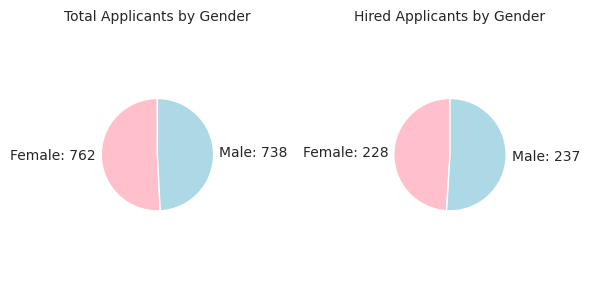

In [42]:
import matplotlib.pyplot as plt

# Total applicants
male = dataset['Gender'].sum()
female = 1500 - male
print('Total male applicants:', male)
print('Total female applicants:', female)

# Hired applicants (assumed values based on your example)
male_hired = 237
female_hired = 228

# Hiring percentages
percent_male_hired = male_hired / male
percent_female_hired = female_hired / female
percent_applicant_hired = (male_hired + female_hired) / 1500

print(f"Percentage of male hired: {percent_male_hired * 100:.2f}%")
print(f"Percentage of female hired: {percent_female_hired * 100:.2f}%")
print(f"Percentage of applicants hired: {percent_applicant_hired * 100:.2f}%")

# Pie chart data
total_values = [female, male]
total_labels = [f'Female: {female}', f'Male: {male}']

hired_values = [female_hired, male_hired]
hired_labels = [f'Female: {female_hired}', f'Male: {male_hired}']

# Plot side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Total applicants pie chart
axes[0].pie(total_values, labels=total_labels, startangle=90, colors=['pink', 'lightblue'])
axes[0].set_title('Total Applicants by Gender', fontsize=10)
axes[0].axis('equal')

# Hired applicants pie chart
axes[1].pie(hired_values, labels=hired_labels, startangle=90, colors=['pink', 'lightblue'])
axes[1].set_title('Hired Applicants by Gender', fontsize=10)
axes[1].axis('equal')

plt.tight_layout()
plt.show()


--> % of male hired is greater than that of female hired

### Calculating mean age of applicants

In [43]:
age_sum_male = 0
age_sum_female = 0
for i in range(len(dataset)):
    if(dataset.Gender[i] == 0):
        age_sum_male += dataset.Age[i]
    else:
        age_sum_female += dataset.Age[i]

print("Mean age of a male applicant : ", age_sum_male/male)
print("Mean age of a female applicant : ", age_sum_female/female)

Mean age of a male applicant :  36.18563685636856
Mean age of a female applicant :  34.14435695538058


### Scale Interview, Skill and Personality

### Creating a dataset for scaled values

In [44]:
dataset_gender_scaled = dataset[['Gender', 'EducationLevel', 'InterviewScore','SkillScore','PersonalityScore','PreviousCompanies', 'RecruitmentStrategy']]
print(dataset_gender_scaled)

      Gender  EducationLevel  InterviewScore  SkillScore  PersonalityScore  \
0          1               2              48          78                91   
1          1               4              35          68                80   
2          0               2              20          67                13   
3          1               2              36          27                70   
4          0               1              23          52                85   
...      ...             ...             ...         ...               ...   
1495       0               2              66           3                80   
1496       1               2              43          97                 7   
1497       1               1              31          91                58   
1498       0               2               9          37                44   
1499       1               2              63          40                26   

      PreviousCompanies  RecruitmentStrategy  
0               

### Scaling down Interview, SKill and Personality score (out of 4)

In [45]:
is_scaled = []
ss_scaled = []
ps_scaled = []

for i in range(len(dataset_gender_scaled['InterviewScore'])):
    score = dataset_gender_scaled.InterviewScore[i]/25
    is_scaled.append(score)

for i in range(len(dataset_gender_scaled['SkillScore'])):
    score = dataset_gender_scaled.SkillScore[i]/25
    ss_scaled.append(score)

for i in range(len(dataset_gender_scaled['PersonalityScore'])):
    score = dataset_gender_scaled.PersonalityScore[i]/25
    ps_scaled.append(score)


print(is_scaled)
print(ss_scaled)
print(ps_scaled)

[np.float64(1.92), np.float64(1.4), np.float64(0.8), np.float64(1.44), np.float64(0.92), np.float64(2.16), np.float64(0.96), np.float64(0.24), np.float64(3.2), np.float64(3.68), np.float64(3.72), np.float64(2.8), np.float64(3.84), np.float64(2.8), np.float64(0.92), np.float64(0.4), np.float64(2.88), np.float64(0.44), np.float64(1.36), np.float64(2.48), np.float64(2.68), np.float64(3.96), np.float64(3.64), np.float64(2.24), np.float64(0.48), np.float64(0.88), np.float64(3.28), np.float64(4.0), np.float64(1.52), np.float64(3.48), np.float64(3.16), np.float64(3.84), np.float64(0.44), np.float64(1.32), np.float64(2.8), np.float64(2.96), np.float64(1.2), np.float64(3.68), np.float64(2.44), np.float64(0.48), np.float64(1.2), np.float64(0.04), np.float64(0.56), np.float64(2.24), np.float64(2.96), np.float64(1.32), np.float64(2.68), np.float64(2.96), np.float64(1.12), np.float64(2.6), np.float64(0.6), np.float64(1.52), np.float64(3.04), np.float64(1.44), np.float64(3.2), np.float64(0.8), np.fl

### Adding scaled values to the dataset

In [46]:
dataset_gender_scaled['InterviewScoreScaled'] = is_scaled
dataset_gender_scaled['SkillScoreScaled'] = ss_scaled
dataset_gender_scaled['PersonalityScoreScaled'] = ps_scaled
dataset_gender_scaled['AgeGroup'] = dataset_age['AgeGroup']

<ipython-input-46-45d3a4692fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_gender_scaled['InterviewScoreScaled'] = is_scaled
<ipython-input-46-45d3a4692fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_gender_scaled['SkillScoreScaled'] = ss_scaled


### Displaying the dataset

In [47]:
dataset_gender_scaled

,Gender,EducationLevel,InterviewScore,SkillScore,PersonalityScore,PreviousCompanies,RecruitmentStrategy,InterviewScoreScaled,SkillScoreScaled,PersonalityScoreScaled,AgeGroup
0,1,2,48,78,91,3,1,1.92,3.12,3.64,25-30
1,1,4,35,68,80,3,2,1.40,2.72,3.20,35-40
2,0,2,20,67,13,2,2,0.80,2.68,0.52,45-50
3,1,2,36,27,70,2,3,1.44,1.08,2.80,30-35
4,0,1,23,52,85,1,2,0.92,2.08,3.40,30-35
...,...,...,...,...,...,...,...,...,...,...,...
1495,0,2,66,3,80,4,3,2.64,0.12,3.20,45-50
1496,1,2,43,97,7,3,2,1.72,3.88,0.28,25-30
1497,1,1,31,91,58,2,1,1.24,3.64,2.32,20-25
1498,0,2,9,37,44,4,2,0.36,1.48,1.76,45-50


### Barplot Visualization for different rows and columns

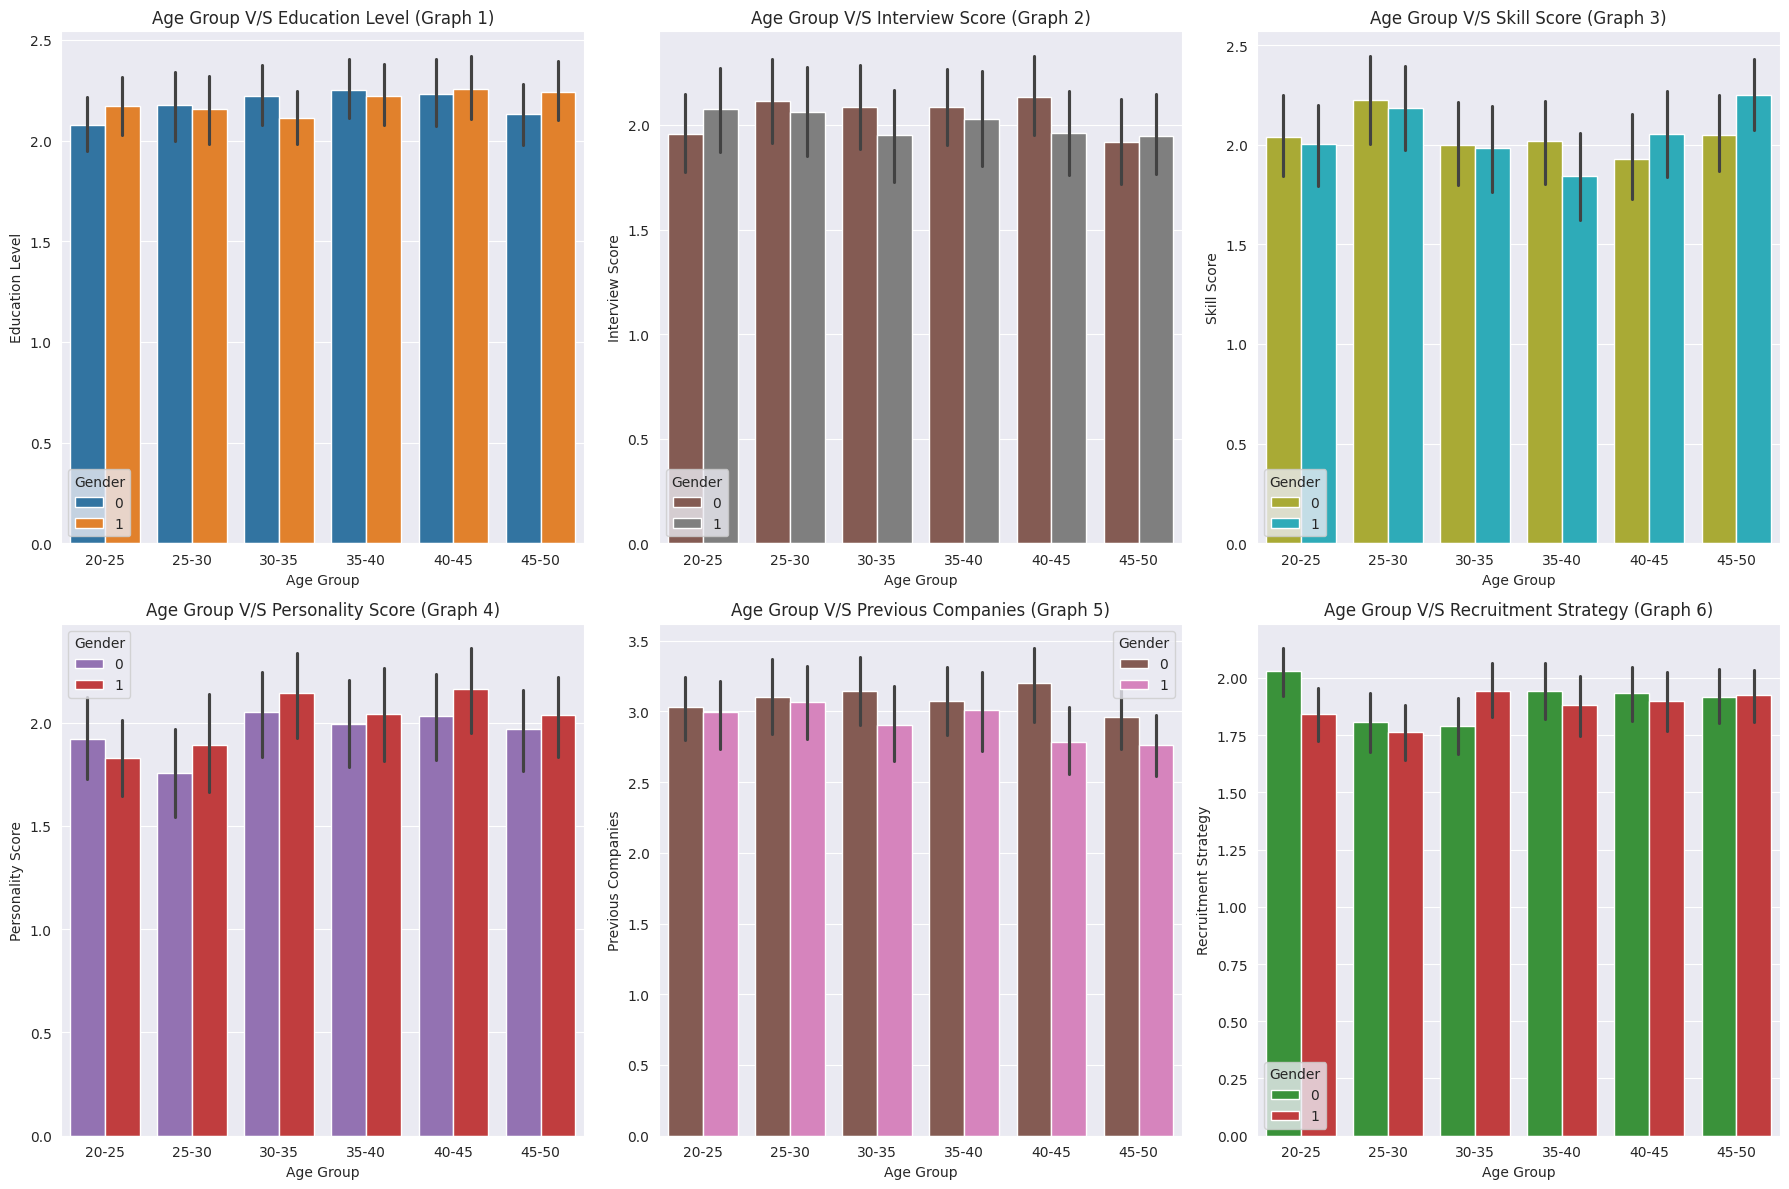

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.set_style("darkgrid")

custom_palette_2 = {
    0 : '#8c564b',
    1 : '#7f7f7f'
}

custom_palette_3 = {
    0 : '#bcbd22',
    1 : '#17becf'
}

custom_palette_4 = {
    0 : '#9467bd',
    1 : '#d62728'
}

custom_palette_5 = {
    0 : '#8c564b',
    1 : '#e377c2'
}

custom_palette_6 = {
    0 : '#2ca02c',
    1 : '#d62728'
}

# Education Level
sns.barplot(x = 'AgeGroup', y ='EducationLevel', hue = 'Gender', data = dataset_gender_scaled, ax=axes[0,0])
axes[0, 0].set_title('Age Group V/S Education Level (Graph 1)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Education Level')

# Interview Score
sns.barplot(x='AgeGroup', y='InterviewScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_2, ax=axes[0, 1])
axes[0, 1].set_title('Age Group V/S Interview Score (Graph 2)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Interview Score')

# Skill Score
sns.barplot(x='AgeGroup', y='SkillScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_3, ax=axes[0, 2])
axes[0, 2].set_title('Age Group V/S Skill Score (Graph 3)')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Skill Score')

# Personality Score
sns.barplot(x='AgeGroup', y='PersonalityScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_4, ax=axes[1, 0])
axes[1, 0].set_title('Age Group V/S Personality Score (Graph 4)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Personality Score')

# Previous Companies
sns.barplot(x='AgeGroup', y='PreviousCompanies', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_5, ax=axes[1, 1])
axes[1, 1].set_title('Age Group V/S Previous Companies (Graph 5)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Previous Companies')

# Recruitment Strategy
sns.barplot(x='AgeGroup', y='RecruitmentStrategy', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_6, ax=axes[1, 2])
axes[1, 2].set_title('Age Group V/S Recruitment Strategy (Graph 6)')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('Recruitment Strategy')

plt.tight_layout()

Note : All the score metrics have been scaled down to 4 for better graph inference and model training purpose

-->
Learning through graph 1 :
  Education levels remain relatively consistent across different age groups. There is no significant variation in education levels when comparing different genders within the same age group. Both male and female individuals have similar education levels in each age group.


Learning through graph 2 :
  Interview scores are fairly consistent across different age groups, with a slight upward trend in the older age groups. There is also a consistent performance between different genders within the same age group, indicating no significant gender bias in interview scores.


Learning through graph 3 :
  Skill scores are generally consistent across different age groups, with a slight increase as age increases. Both genders have similar skill scores within each age group, suggesting that skill levels do not vary significantly by gender.


Learning through graph 4 :
  Personality scores show more variation compared to other metrics. The age group 30-35 has higher personality scores for both genders. Males generally have slightly higher personality scores than females in most age groups.

Learning through graph 5 :
  The number of previous companies increases with age, peaking in the 35-40 age group, and then slightly decreasing for older age groups. This trend is consistent for both genders, indicating that experience (in terms of previous companies) accumulates with age but may plateau or decrease slightly as individuals reach older age groups.


Learning through graph 6 :
  Recruitment strategies are consistent across age groups, with no significant variation between genders. This suggests that recruitment strategies are uniformly applied across different age groups and genders.

## Exploring through other Attributes

###  Education Level vs Hiring Decision

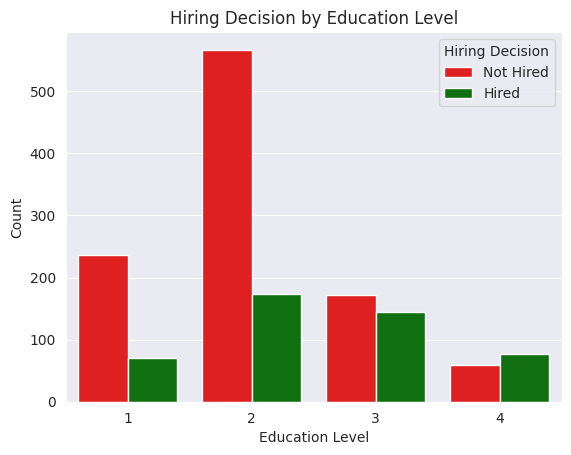

In [49]:
custom_palette = {
    0: "red",
    1: "green"
}

sns.countplot(data=dataset, x='EducationLevel', hue='HiringDecision', palette=custom_palette)

plt.title("Hiring Decision by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Hiring Decision", labels=["Not Hired", "Hired"])
plt.show()

The graph shows that higher education levels are generally associated with a greater likelihood of being hired. Specifically:

- Education Level 2 has the highest number of applicants but also the highest rejection rate.
- Education Level 3 has a more balanced hiring-to-rejection ratio.
- Education Level 4, though with fewer applicants, has more hires than rejections.
- Overall, hiring likelihood increases with education level.

 ### Years of Experience vs Hiring

<ipython-input-50-d9fec63af67c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='HiringDecision', y='ExperienceYears', palette=custom_palette)


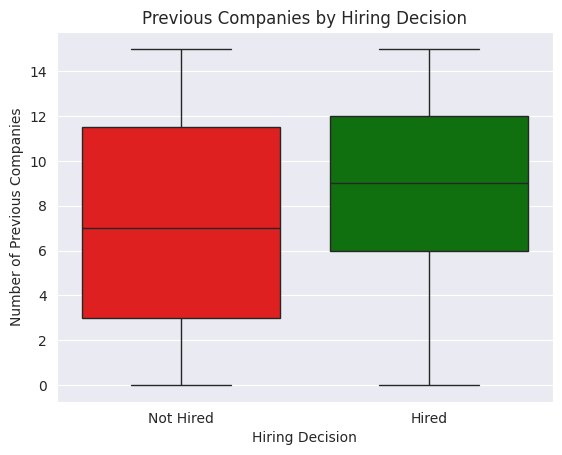

In [50]:
custom_palette = {
    '0': 'red',    # Not Hired
    '1': 'green'   # Hired
}

sns.boxplot(data=dataset, x='HiringDecision', y='ExperienceYears', palette=custom_palette)
plt.title("Previous Companies by Hiring Decision")
plt.xlabel("Hiring Decision")
plt.ylabel("Number of Previous Companies")
plt.xticks([0, 1], ["Not Hired", "Hired"])
plt.show()


The boxplot shows the distribution of the number of previous companies worked at, based on hiring decision:

- **Hired candidates** generally have **more experience**, with a higher median number of previous companies (around 9) compared to **Not Hired** candidates (median around 7).
- The **interquartile range (IQR)** is slightly higher for hired candidates, indicating more variation in experience.
- Both groups have some candidates with **0 previous companies**, but hiring is more likely when the number of previous companies is higher.
- Overall, **more experience (more previous companies)** seems to correlate positively with being hired.

### Previous Companies vs Hiring

<ipython-input-51-221fbbb2db53>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='HiringDecision', y='PreviousCompanies', palette=custom_palette)


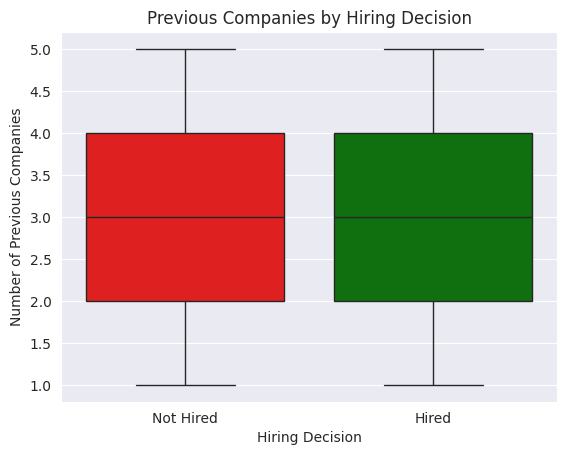

In [51]:
sns.boxplot(data=dataset, x='HiringDecision', y='PreviousCompanies', palette=custom_palette)
plt.title("Previous Companies by Hiring Decision")
plt.xlabel("Hiring Decision")
plt.ylabel("Number of Previous Companies")
plt.xticks([0, 1], ["Not Hired", "Hired"])
plt.show()

The boxplot indicates that the **number of previous companies** worked at is **similar** for both **hired** and **not hired** candidates:

- The **medians** are identical (both at 3), suggesting no significant difference in central tendency.
- The **interquartile ranges (IQR)** and **overall spread** are also nearly the same.
- This implies that **number of previous companies alone may not be a strong differentiating factor** in the hiring decision within this dataset.

### Interview Score, Skill Score and Personality Score V/S Hiring Decision

<ipython-input-52-41ef7429ab83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='HiringDecision', y='InterviewScore', ax=axes[0], palette=custom_palette)
<ipython-input-52-41ef7429ab83>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='HiringDecision', y='SkillScore', ax=axes[1], palette=custom_palette)
<ipython-input-52-41ef7429ab83>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='HiringDecision', y='PersonalityScore', ax=axes[2], palette=custom_palette)


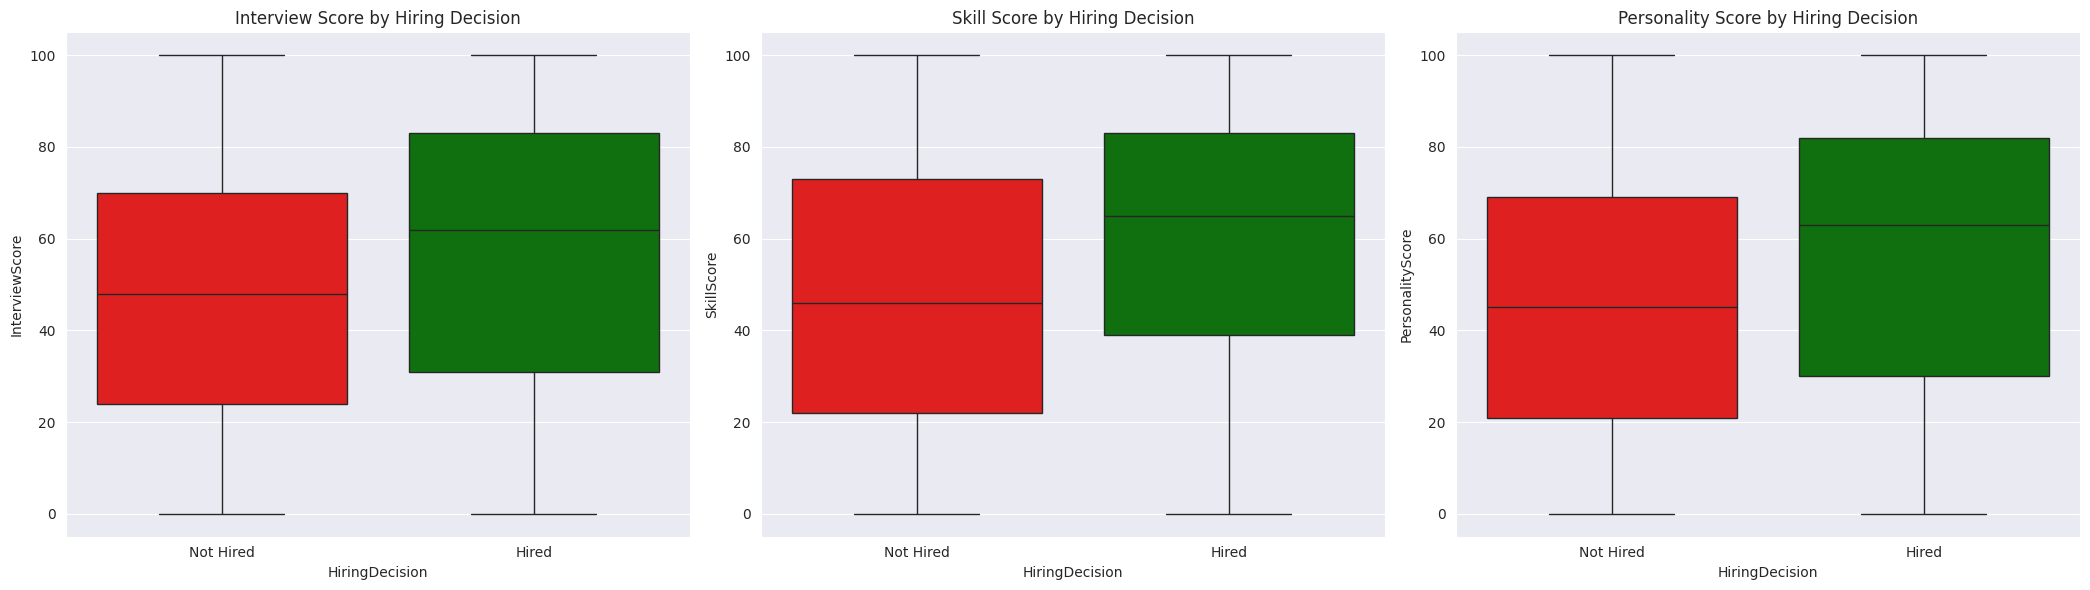

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Plot for Interview Score
sns.boxplot(data=dataset, x='HiringDecision', y='InterviewScore', ax=axes[0], palette=custom_palette)
axes[0].set_title("Interview Score by Hiring Decision")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Hired", "Hired"])

# Plot for Skill Score
sns.boxplot(data=dataset, x='HiringDecision', y='SkillScore', ax=axes[1], palette=custom_palette)
axes[1].set_title("Skill Score by Hiring Decision")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Hired", "Hired"])

# Plot for Personality Score
sns.boxplot(data=dataset, x='HiringDecision', y='PersonalityScore', ax=axes[2], palette=custom_palette)
axes[2].set_title("Personality Score by Hiring Decision")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Hired", "Hired"])

plt.tight_layout()
plt.show()

The boxplots show that:

- **Interview Scores**: Hired candidates generally have higher median scores compared to not hired candidates.
- **Skill Scores**: Hired individuals exhibit significantly higher skill scores, indicating technical ability plays a major role.
- **Personality Scores**: Personality scores are also higher for hired candidates, suggesting this factor influences hiring decisions.

Each of these metrics shows a clear difference in distribution based on hiring outcome.

### Recruitment Strategy Effectiveness

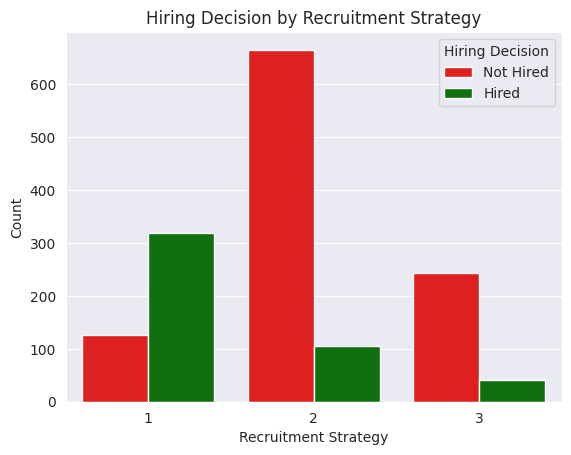

In [55]:
custom_palette = {
    0: 'red',    # Not Hired
    1: 'green'   # Hired
}

sns.countplot(data=dataset, x='RecruitmentStrategy', hue='HiringDecision', palette=custom_palette)
plt.title("Hiring Decision by Recruitment Strategy")
plt.xlabel("Recruitment Strategy")
plt.ylabel("Count")
plt.legend(title="Hiring Decision", labels=["Not Hired", "Hired"])
plt.show()


- The plot reveals that **Recruitment Strategy 1** has the highest number of successful hires.  
- In contrast, **Recruitment Strategy 2** accounts for the highest number of rejections, indicating it may be less effective.  
- **Recruitment Strategy 3** results in relatively low hiring outcomes overall.  

These observations suggest that the **method of recruitment significantly impacts hiring success** and should be carefully evaluated when designing recruitment processes.

### Correlation with Hiring Decision

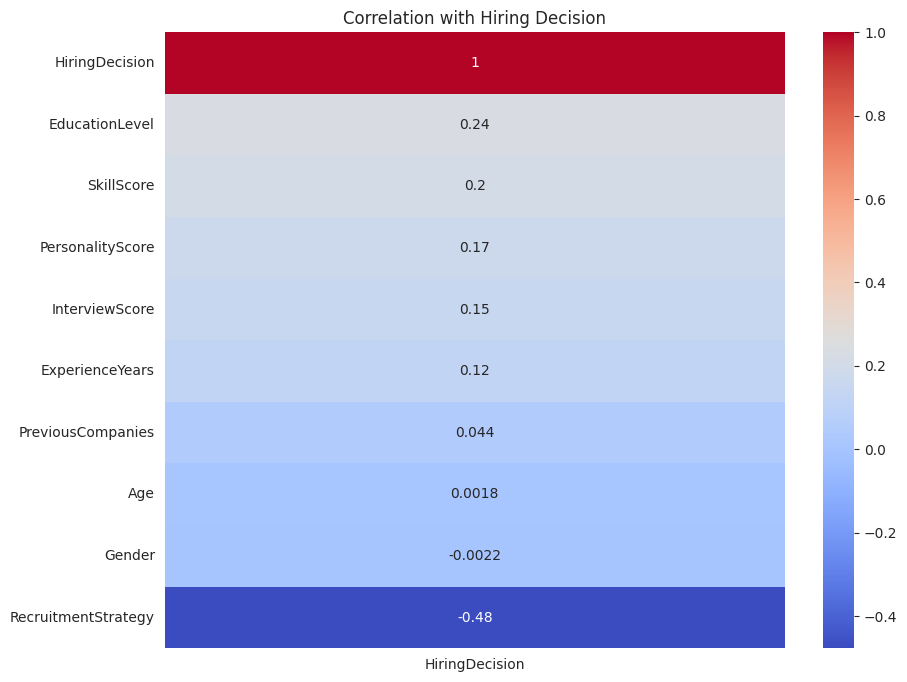

In [56]:
plt.figure(figsize=(10, 8))
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr[['HiringDecision']].sort_values(by='HiringDecision', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Hiring Decision")
plt.show()

The heatmap shows the correlation of various features with the hiring decision:

- **Education Level (0.24), Skill Score (0.20), Personality Score (0.17), Interview Score (0.15), and Experience Years (0.12)** have positive correlations, suggesting they contribute positively to hiring decisions.
- **Age (0.0018) and Gender (-0.0022)** show negligible correlation, indicating minimal influence.
- **Recruitment Strategy (-0.48)** has a strong negative correlation, implying that certain strategies may negatively affect hiring outcomes.

Overall, merit-based factors matter more than demographic ones, and the recruitment strategy may need reevaluation.

### Checking for multicollinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Add a constant column to the dataset for VIF calculation
X = dataset[numeric_cols]
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("\nVariance Inflation Factor (VIF) for each feature:\n")
print(vif_data.to_string(index=False))


Variance Inflation Factor (VIF) for each feature:

            Feature       VIF
              const 46.906731
                Age  1.005101
             Gender  1.006781
     EducationLevel  1.085303
    ExperienceYears  1.037650
  PreviousCompanies  1.009745
     InterviewScore  1.047823
         SkillScore  1.068963
   PersonalityScore  1.051056
RecruitmentStrategy  1.366151
     HiringDecision  1.634681


--> Multicollinearity doesn't exist

# Outlier detection and handling

### Importing libraries

In [ ]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

numeric_cols = ['Age', 'ExperienceYears', 'PreviousCompanies',
                'InterviewScore', 'SkillScore', 'PersonalityScore']

### Statistical Outliers

In [ ]:
# Z-score
z_scores = dataset[numeric_cols].apply(zscore)
dataset['Outlier_ZScore'] = (z_scores.abs() > 3).any(axis=1)

# IQR
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
dataset['Outlier_IQR'] = outliers_iqr

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
dataset['Outlier_IForest'] = iso_forest.fit_predict(dataset[numeric_cols]) == -1

### Logic Rule-based Outliers

In [ ]:
def check_logic_violations(row):
    violations = []

    age = row['Age']
    edu = row['EducationLevel']
    exp = row['ExperienceYears']
    prev_comp = row['PreviousCompanies']
    interview = row['InterviewScore']
    skill = row['SkillScore']
    personality = row['PersonalityScore']

    # Education Level vs Age
    if edu in [1, 2] and age < 21:
        violations.append('Too young for Bachelor’s')
    elif edu == 3 and age < 23:
        violations.append('Too young for Master’s')
    elif edu == 4 and age < 27:
        violations.append('Too young for PhD')

    # Experience vs Age
    if exp > (age - 18):
        violations.append('Experience > possible working years')

    # Previous Companies vs Experience
    if prev_comp > exp:
        violations.append('Too many companies for experience')


    # Scores out of bounds
    for score, name in zip([interview, skill, personality],
                           ['InterviewScore', 'SkillScore', 'PersonalityScore']):
        if score < 0 or score > 100:
            violations.append(f'{name} out of range')

    return ', '.join(violations) if violations else None

dataset['LogicalOutlierReason'] = dataset.apply(check_logic_violations, axis=1)
dataset['Outlier_Logical'] = dataset['LogicalOutlierReason'].notnull()

### Final Outliers

In [ ]:
dataset['Any_Outlier'] = dataset[['Outlier_ZScore', 'Outlier_IQR', 'Outlier_IForest', 'Outlier_Logical']].any(axis=1)

outliers_df = dataset[dataset['Any_Outlier'] == True]

# Preview
print(outliers_df[['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies',
                   'Outlier_ZScore', 'Outlier_IQR',
                   'Outlier_IForest', 'Outlier_Logical', 'LogicalOutlierReason']].head())


## Feature Engineering and Preprocessing

### Dropping Outlier-Tag Columns

In [ ]:
dataset= dataset.drop(columns=['Outlier_ZScore', 'Outlier_IQR', 'Outlier_IForest', 'Outlier_Logical', 'LogicalOutlierReason', 'Any_Outlier'])

### Standardizing Numerical Attributes

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate categorical and numerical columns
categorical_columns = ['Gender', 'EducationLevel', 'RecruitmentStrategy']
numerical_columns = ['Age', 'ExperienceYears', 'PreviousCompanies',
                     'InterviewScore', 'SkillScore', 'PersonalityScore']

# Standardizing numerical columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Now df has standardized numerical features and categorical features are untouched
print(dataset.head())

## Modeling

### Import Libraries

In [ ]:
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, classification_report,
                             precision_score, recall_score, confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

### Define Features

In [ ]:
X = dataset.drop(columns=['HiringDecision'])
y = dataset['HiringDecision']

numerical_columns = ['Age', 'ExperienceYears', 'PreviousCompanies',
                     'InterviewScore', 'SkillScore', 'PersonalityScore']
categorical_columns = ['Gender', 'EducationLevel', 'RecruitmentStrategy']

### Define Pre-processing

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns)
], remainder='passthrough')  # Keeps categorical columns as-is

### Define Model Search Space

In [ ]:
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100],
            'classifier__max_depth': [None, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100],
            'classifier__learning_rate': [0.1]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100],
            'classifier__learning_rate': [0.1]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            'classifier__C': [1],
            'classifier__solver': ['liblinear']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'classifier__n_neighbors': [5]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'classifier__max_depth': [None, 10],
            'classifier__min_samples_split': [2, 5]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            'classifier__C': [1],
            'classifier__kernel': ['rbf']
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'classifier__n_estimators': [100],
            'classifier__max_depth': [3]
        }
    }
}

### Train, Evaluate, Store Results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = []

for name, mp in models.items():
    print(f"Training {name}...")

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])

    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_pipe = grid.best_estimator_
    y_pred = best_pipe.predict(X_test)
    y_prob = best_pipe.predict_proba(X_test)[:, 1] if hasattr(best_pipe, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    cv_scores = cross_val_score(best_pipe, X, y, cv=5, scoring='f1')

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]

    print(f"\n{name}")
    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.4f} | F1 Score: {f1:.4f} | AUC: {auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nDetailed Classification Report:")
    print(report_df.loc[['0', '1']])  # metrics for each class
    print("----------------------------------------------------")

    results.append({
        "Model": name,
        "Pipeline": best_pipe,
        "Best Params": grid.best_params_,
        "Test Accuracy": acc,
        "Test F1 Score": f1,
        "Test AUC": auc,
        "CV F1 Mean": cv_scores.mean(),
        "CV F1 Std": cv_scores.std(),
        "Class 0 Precision": report['0']['precision'],
        "Class 0 Recall": report['0']['recall'],
        "Class 0 F1": report['0']['f1-score'],
        "Class 1 Precision": report['1']['precision'],
        "Class 1 Recall": report['1']['recall'],
        "Class 1 F1": report['1']['f1-score'],
    })

### Compare Models

In [ ]:
results_df = pd.DataFrame(results)
display(results_df[['Model', 'Test Accuracy', 'Test F1 Score', 'Test AUC',
                    'Class 0 Precision', 'Class 0 Recall', 'Class 0 F1',
                    'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1']].sort_values(by='Test F1 Score', ascending=False))


### Save the best model

In [ ]:
best_row = results_df.sort_values(by='Test F1 Score', ascending=False).iloc[0]
best_pipeline = best_row['Pipeline']
model_filename = f"HireOrNot.pkl"

with open(model_filename, 'wb') as f:
    pickle.dump(best_pipeline, f)

print(f"\nBest Model: {best_row['Model']}")
print(f"Model pipeline saved as: {model_filename}")